<a href="https://colab.research.google.com/github/iamhero2709/Learning-Projects-Notebook/blob/main/ml_projects/CustomerSegmentation1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Customer Segmentation using KMeans, DBSCAN, and PCA
In this notebook, we explore customer behavior using unsupervised learning techniques — KMeans, DBSCAN, and PCA — to uncover meaningful segments for targeted marketing strategies.


✨ Final Notebook Sections:
---
📊1. Load and Preprocess Data

📈 2.Visualize Distribution (EDA)

🔘 3.KMeans Clustering + Elbow + Silhouette Score

🧪4. DBSCAN Clustering (with tuning eps and min_samples)

🔍5. PCA for 2D & 3D Visualization

📌6. Compare Clusters: Business Insights

🧠7. Suggest Marketing Strategy per Segment

💾8. Save All Models for App Integration

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans,DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [8]:
# DATA LOADING
df=pd.read_csv('13_customer_segmentation.csv')

In [10]:
df.head()


,customer_id,age,income,spending_score,visits_per_month
0,CUST1000,56,120186,55,9
1,CUST1001,69,49674,80,1
2,CUST1002,46,61271,62,8
3,CUST1003,32,88688,30,6
4,CUST1004,60,126076,55,6


In [11]:
# i think the custmer id is not useful for us the we will drop customer id
# dropping customer id
df.drop('customer_id', axis=1, inplace=True)
df.head()

,age,income,spending_score,visits_per_month
0,56,120186,55,9
1,69,49674,80,1
2,46,61271,62,8
3,32,88688,30,6
4,60,126076,55,6


In [12]:
# scaling the feature
features=['age','income','spending_score','visits_per_month']
scaler=StandardScaler()
scaled=scaler.fit_transform(df[features])

In [13]:
df.head()

,age,income,spending_score,visits_per_month
0,56,120186,55,9
1,69,49674,80,1
2,46,61271,62,8
3,32,88688,30,6
4,60,126076,55,6


In [14]:
print(df.isna().any().any())


False


what is ELBOW Method?
---
use -"TO FIND BEST NO OF CLUSTER (K)"
   -This method  check WCSS(Within-cluster sum of square)  vs no of cluster(k) graph




📉 WCSS (Within-Cluster Sum of Squares):
---

Har cluster ke andar points ka apne centroid se distance ka square.

KMeans ka goal hota hai: WCSS ko minimize karna.

Jab clusters badhata hai (k zyada), WCSS kam hota jaata hai.

But ek point ke baad improvement slow ho jata hai = "elbow" point.

❓ Q: range(1, 11) kyu?
Tu k = 1 se 10 tak try kar raha hai.

Elbow method tabhi kaam karega jab multiple values of k ka WCSS compare karo.

Usually 1 se 10 enough hota hai — agar data complex ho to tu 15, 20 bhi try kar sakta hai.

❓ Q: random_state=42 kyu?
KMeans random centroid se start karta hai.

Har baar run karne par alag result aa sakta hai.

random_state=42 lagane se same result bar-bar milta hai (reproducibility ke liye).

42 is just a common number used by convention. Tu kuch bhi daal sakta hai.


| Concept              | Explanation                                              |
| -------------------- | -------------------------------------------------------- |
| **Elbow Method**     | Best number of clusters find karne ka graph-based method |
| **WCSS**             | Cluster ke andar point-to-centroid distance ka square    |
| **range(1, 11)**     | Try k=1 to 10 clusters                                   |
| **random\_state=42** | Same result baar-baar milne ke liye                      |


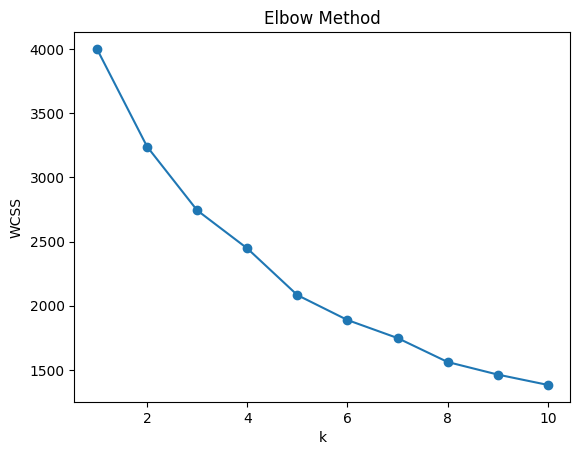

In [15]:
# using kmeans clustering
# using elbow method
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i, random_state=42)
  kmeans.fit(scaled)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("k")
plt.ylabel("WCSS")
plt.show()

🔍WHAT WE HAVE TO OBSERVE ?
---
We look for the point where the WCSS drop slows down — jaha tak clustering kaafi improvement deta hai, uske baad fayda kam ho jaata hai.

In [16]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled)
df['KMeans_Cluster'] = kmeans_labels
print("Silhouette Score (KMeans):", silhouette_score(scaled, kmeans_labels))


Silhouette Score (KMeans): 0.20334108469743928


🔍 Silhouette Score kya hota hai?
---
*  Silhouette Score measure karta hai clustering quality:

* Silhouette Score
∈
[
−
1
,
1
]

Score Range	Meaning
---
* +1	Perfect clustering (well separated)
* ~0.5	Reasonable clustering
* ~0.2 - 0.3	Weak clustering (but usable)
* 0 or negative	Bad clustering (wrong number of clusters or overlap)

In [18]:
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled)
    score = silhouette_score(scaled, labels)
    print(f"k={k}, Silhouette Score: {score:.4f}")


k=2, Silhouette Score: 0.1869
k=3, Silhouette Score: 0.1842
k=4, Silhouette Score: 0.1826
k=5, Silhouette Score: 0.2033
k=6, Silhouette Score: 0.2012
k=7, Silhouette Score: 0.2024
k=8, Silhouette Score: 0.2134
k=9, Silhouette Score: 0.2100
k=10, Silhouette Score: 0.2081


In [17]:
# getting bad score for Silhouette Score
#Now we are going to debug it
# OUR CLUSTER SCORE IS VERY WEAK
'''
what should be the reason for this bad clustering score
1. overalp in feature
2.wrong no of cluster
3.data alreeady dense or not cluterable

** Lets fix this by anlysing all the point **

'''

In [19]:
# first we observed scaled dataset
print(pd.DataFrame(scaled).describe())


                  0             1             2             3
count  1.000000e+03  1.000000e+03  1.000000e+03  1.000000e+03
mean  -1.634248e-16 -1.558753e-16  9.237056e-17  4.796163e-17
std    1.000500e+00  1.000500e+00  1.000500e+00  1.000500e+00
min   -1.723158e+00 -1.752649e+00 -1.640320e+00 -1.640097e+00
25%   -8.555393e-01 -8.643568e-01 -9.178786e-01 -9.181438e-01
50%    1.207993e-02  9.256652e-03 -2.342773e-02 -1.570248e-02
75%    8.129592e-01  8.706799e-01  8.710231e-01  8.867389e-01
max    1.680578e+00  1.678250e+00  1.731072e+00  1.608692e+00


<Axes: >

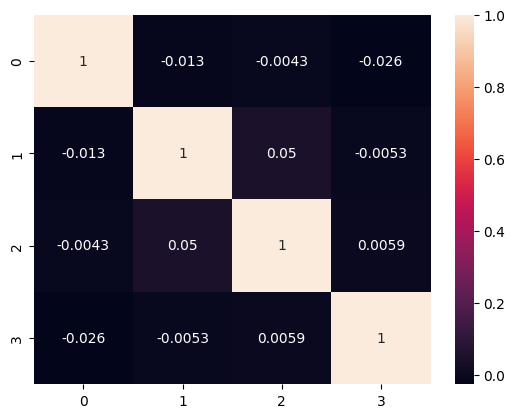

In [20]:
# i think there is no problem in scaling all are perfect

# check correlation feature
import seaborn as sns
sns.heatmap(pd.DataFrame(scaled).corr(), annot=True)


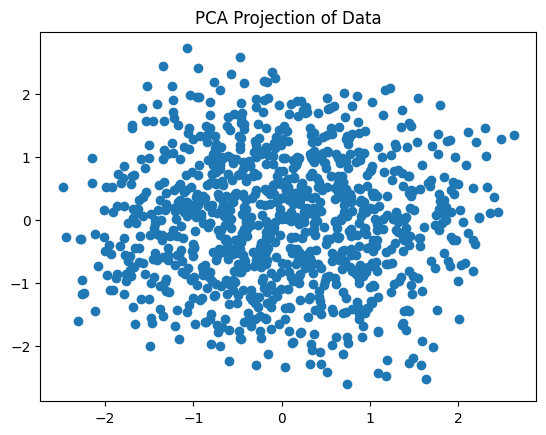

In [21]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled)

plt.scatter(pca_data[:, 0], pca_data[:, 1])
plt.title("PCA Projection of Data")
plt.show()


🔹 3. Try PCA for Dimensionality Reduction
--
* PCA se noise, redundancy hata sakta hai.

🧪 1. Correlation Matrix Analysis
---
* Feature Pair	Correlation
All pairs	Very weak (mostly < ±0.05)

🔍 Interpretation:

* Features aapas me almost independent hain.

* ✅ Achha hai ki multicollinearity nahi hai.

* ❌ Lekin iska matlab ye bhi ho sakta hai ki features me meaningful clustering signal hi nahi hai.

🧭 2. PCA Scatter Plot Analysis
---
* Data ka 2D projection circular cloud jaisa lag raha hai
* Kahi pe dense cluster ya clear separation nahi dikh rahi

🔍 Interpretation:
---

* Data me clear cluster structure nahi hai

* Clustering algorithm (KMeans/DBSCAN) ko koi strong groupings mil hi nahi rahe

* Data shayad synthetic/random ya highly uniform ho sakta hai



In [33]:
# Option 1: Try to Add Better Feature
#Option 2: Try t-SNE for Non-linear Patterns


In [36]:
# option 1
df['AgeGroup'] = pd.cut(df['age'], bins=[18, 25, 35, 50, 65], labels=[1,2,3,4])
df['IncomePerVisit'] = df['income'] / (df['visits_per_month'] + 1)
df['SpendingPerVisit'] = df['spending_score'] / (df['visits_per_month'] + 1)


In [26]:
df.head()

,age,income,spending_score,visits_per_month,KMeans_Cluster,Cluster,AgeGroup,IncomePerVisit,SpendingPerVisit
0,56,120186,55,9,2,2,4,12018.600000,5.500000
1,69,49674,80,1,2,2,NaN,24837.000000,40.000000
2,46,61271,62,8,0,2,3,6807.888889,6.888889
3,32,88688,30,6,1,1,2,12669.714286,4.285714
4,60,126076,55,6,2,2,4,18010.857143,7.857143


In [38]:
features = df[['income', 'spending_score', 'IncomePerVisit', 'SpendingPerVisit']]


In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(features)


In [40]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

best_score = -1
best_k = 0

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled)
    score = silhouette_score(scaled, labels)
    print(f"k={k}, Silhouette Score: {score:.4f}")

    if score > best_score:
        best_score = score
        best_k = k


k=2, Silhouette Score: 0.3292
k=3, Silhouette Score: 0.2921
k=4, Silhouette Score: 0.3015
k=5, Silhouette Score: 0.3192
k=6, Silhouette Score: 0.3172
k=7, Silhouette Score: 0.3225
k=8, Silhouette Score: 0.3243
k=9, Silhouette Score: 0.3013
k=10, Silhouette Score: 0.3105


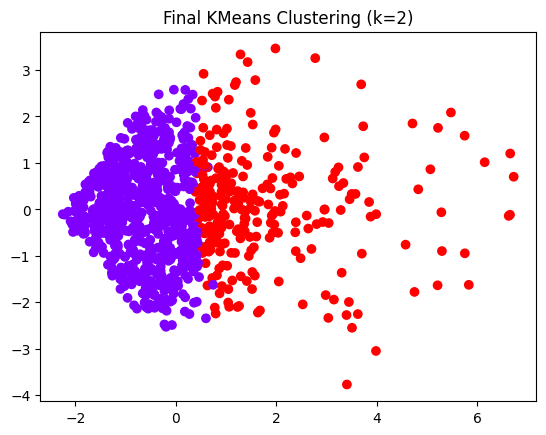

In [41]:
final_kmeans = KMeans(n_clusters=best_k, random_state=42)
df['FinalCluster'] = final_kmeans.fit_predict(scaled)

# PCA visualization
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled)

plt.scatter(pca_data[:,0], pca_data[:,1], c=df['FinalCluster'], cmap='rainbow')
plt.title(f"Final KMeans Clustering (k={best_k})")
plt.show()


In [31]:
df.groupby('FinalCluster')[['income', 'spending_score', 'IncomePerVisit', 'SpendingPerVisit']].mean()


,income,spending_score,IncomePerVisit,SpendingPerVisit
FinalCluster,,,,
0,73461.601928,41.085399,7038.517997,3.845562
1,111771.302920,68.806569,22733.775396,13.838518


In [32]:
df['CustomerSegment'] = df['FinalCluster'].map({
    0: 'Budget Spenders',
    1: 'Premium Customers'
})


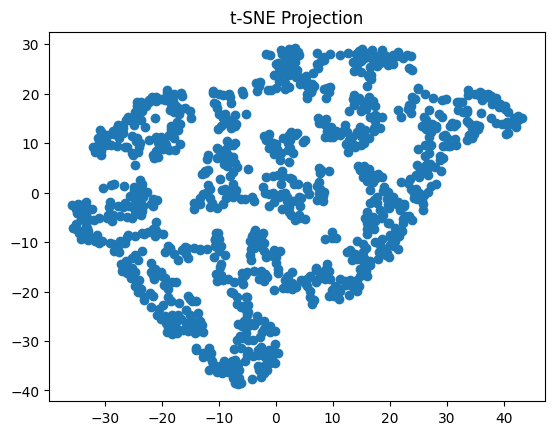

In [43]:
#Option 2: Try t-SNE for Non-linear Patterns
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_data = tsne.fit_transform(scaled)

plt.scatter(tsne_data[:, 0], tsne_data[:, 1])
plt.title("t-SNE Projection")
plt.show()


🧠 t-SNE kya karta hai?
---
* t-SNE = t-Distributed Stochastic Neighbor Embedding
*📉 Ye ek non-linear dimensionality reduction technique hai
*📌 Ye high-dimensional data ko 2D/3D me convert karta hai taaki hum uska structure visualize kar sakein

🔹 Matlab kya?
---
* Original data (4 ya 5 features) ko 2D plot me compress karta hai

* But compression me "closeness" ya local neighborhood preserve karta hai

* To jo points original data me pass-pass the, wo yahan bhi pass-pass hi dikhte hain

📈 Tere t-SNE Plot se kya samjhe?
---

*✅ Observations:
Yeh plot clearly dikhata hai ki data me kuch natural formations hain (like dense islands or clusters)

*Lekin boundaries fuzzy hain — iska matlab clusters hai to sahi, but overlap bhi hai

*Pure circular or spherical clusters nahi dikh rahe — that's why KMeans thoda limited perform kar raha

| Technique  | Purpose          | Good At                           | Bad At                             |
| ---------- | ---------------- | --------------------------------- | ---------------------------------- |
| **PCA**    | Linear reduction | Speed & global structure          | Misses non-linear patterns         |
| **t-SNE**  | Visual grouping  | Local structure, complex clusters | Slow, no clustering output         |
| **KMeans** | Clustering       | Well-separated spherical clusters | Fails if overlap or shape is weird |


In [46]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

for eps in [0.3, 0.5, 0.8, 1.0, 1.2, 1.5, 2.0]:
    for min_pts in [3, 4, 5]:
        dbscan = DBSCAN(eps=eps, min_samples=min_pts)
        labels = dbscan.fit_predict(scaled)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

        if n_clusters > 1:
            score = silhouette_score(scaled, labels)
            print(f"eps={eps}, min_samples={min_pts}, clusters={n_clusters}, Silhouette Score={score:.4f}")
        else:
            print(f"eps={eps}, min_samples={min_pts} → No valid clusters")


eps=0.3, min_samples=3, clusters=16, Silhouette Score=-0.3939
eps=0.3, min_samples=4, clusters=9, Silhouette Score=-0.4097
eps=0.3, min_samples=5, clusters=2, Silhouette Score=-0.1576
eps=0.5, min_samples=3, clusters=11, Silhouette Score=0.1000
eps=0.5, min_samples=4, clusters=8, Silhouette Score=-0.0188
eps=0.5, min_samples=5, clusters=7, Silhouette Score=-0.0419
eps=0.8, min_samples=3, clusters=8, Silhouette Score=0.2924
eps=0.8, min_samples=4, clusters=5, Silhouette Score=0.3879
eps=0.8, min_samples=5 → No valid clusters
eps=1.0, min_samples=3, clusters=5, Silhouette Score=0.4498
eps=1.0, min_samples=4, clusters=5, Silhouette Score=0.4345
eps=1.0, min_samples=5, clusters=4, Silhouette Score=0.5008
eps=1.2, min_samples=3 → No valid clusters
eps=1.2, min_samples=4, clusters=2, Silhouette Score=0.5345
eps=1.2, min_samples=5, clusters=3, Silhouette Score=0.5284
eps=1.5, min_samples=3 → No valid clusters
eps=1.5, min_samples=4 → No valid clusters
eps=1.5, min_samples=5 → No valid cluster

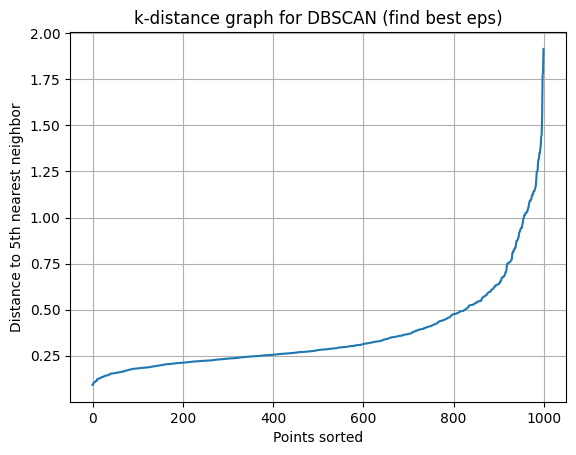

In [47]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(scaled)
distances, indices = neighbors_fit.kneighbors(scaled)

distances = np.sort(distances[:, 4])
plt.plot(distances)
plt.title("k-distance graph for DBSCAN (find best eps)")
plt.xlabel("Points sorted")
plt.ylabel("Distance to 5th nearest neighbor")
plt.grid()
plt.show()


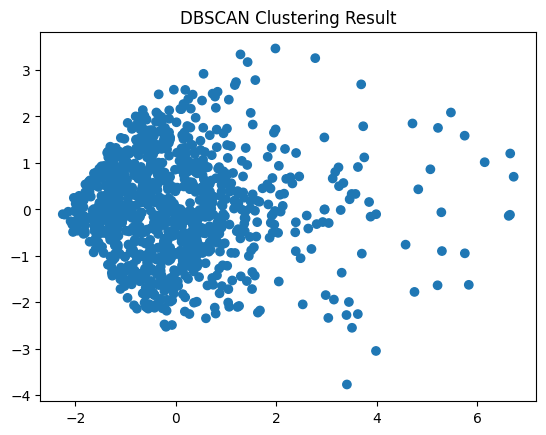

In [48]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled)

plt.scatter(pca_data[:, 0], pca_data[:, 1], c=labels, cmap='tab10')
plt.title("DBSCAN Clustering Result")
plt.show()


In [49]:
for eps in [0.8, 0.9, 1.0, 1.1, 1.2]:
    dbscan = DBSCAN(eps=eps, min_samples=4)
    labels = dbscan.fit_predict(scaled)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

    if n_clusters > 1:
        score = silhouette_score(scaled, labels)
        print(f"eps={eps}, clusters={n_clusters}, Silhouette Score={score:.4f}")
    else:
        print(f"eps={eps} → only noise or 1 cluster")


eps=0.8, clusters=5, Silhouette Score=0.3879
eps=0.9, clusters=5, Silhouette Score=0.4392
eps=1.0, clusters=5, Silhouette Score=0.4345
eps=1.1, clusters=4, Silhouette Score=0.4871
eps=1.2, clusters=2, Silhouette Score=0.5345


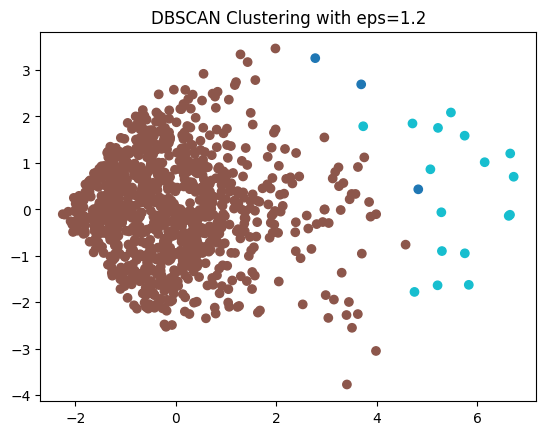

In [50]:
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=labels, cmap='tab10')
plt.title(f"DBSCAN Clustering with eps={eps}")
plt.show()
